In [53]:
%load_ext autoreload
%autoreload 2
from dpe import DPE
from lib_data import *
import matplotlib.pyplot as plt
import numpy as np
from lib_nn_dpe import NN_dpe
from IPython import display

import serial
%config InlineBackend.figure_formats = ['svg']

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [96]:
dpe = DPE('COM3')

Running <function DPE.init_dut at 0x000001DF2A897828> with serial
DAC initialized to a span from -10 V to 10 V
Setting vrefs to default
[INFO] Elapsed time = 0.03s
Serial disconnected


In [128]:
dpe.set_clock(50)

Running <function DPE.set_clock at 0x000001DF2A897A68> with serial
Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz
[INFO] Elapsed time = 0.00s
Serial disconnected


In [ ]:
# dpe.power_off()

In [55]:
a0=dpe.a0

In [69]:
with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    a0.dut.connect(ser)
    a0.pic_write_single(0, 0, array=0, row=0, col=0, mode=0)

In [57]:
# vlim_lo, vlim_hi = -10, 10

# ((vset - vlim_lo) / (vlim_hi-vlim_lo) * 0xffff).astype(int)

# # data = int((vset - vlim_lo) / (vlim_hi-vlim_lo) * 0xffff)

In [58]:
vset = np.ones((64,64)) * 0

for i in range(64):
    vset[i,:] = (64-i)/64*-10

vset_raw = a0.dut.dac_volt2raw(vset)
# vset_raw

vgate_raw = a0.dut.dac_volt2raw(vset+1)

vhex = np.vectorize(hex)
vhex(vset_raw[::16,::16])

array([['0x0', '0x0', '0x0', '0x0'],
       ['0x1fff', '0x1fff', '0x1fff', '0x1fff'],
       ['0x3fff', '0x3fff', '0x3fff', '0x3fff'],
       ['0x5fff', '0x5fff', '0x5fff', '0x5fff']], dtype='<U6')

In [59]:
vhex(vgate_raw[::16,::16])

array([['0xccc', '0xccc', '0xccc', '0xccc'],
       ['0x2ccc', '0x2ccc', '0x2ccc', '0x2ccc'],
       ['0x4ccc', '0x4ccc', '0x4ccc', '0x4ccc'],
       ['0x6ccc', '0x6ccc', '0x6ccc', '0x6ccc']], dtype='<U6')

In [60]:
len(vset_raw[:4,:].tobytes() )

512

In [61]:
0x4ccc

19660

In [80]:
import time
with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    a0.dut.connect(ser)
    ts = time.time()
    a0.pic_write_batch(vset, vset+1, array=0, mode=0)
    print(time.time()-ts)

0.4290647506713867


Running <function DPE.read at 0x000001DF30765798> with serial
[INFO] Elapsed time = 0.23s
Serial disconnected


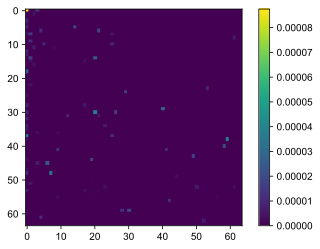

In [139]:
plt.imshow(dpe.read(2, gain=3))
plt.colorbar()

Running <function DPE.power_off at 0x000001DF2A897948> with serial
[INFO] Elapsed time = 0.01s
Serial disconnected


In [104]:
vRead=0.1
Vgate=5

arr=2
rr=30
cc=20

vgate_set = 1
vset_list = np.arange(0,1.5,0.1)

curr_list = []

with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    a0.dut.connect(ser)
    
    for vset in vset_list:
        a0.pic_write_single(vset, vgate_set, array=arr, row=rr, col=cc, mode=1)
        
        rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1)
        curr_list.append(rdCurr)

In [105]:
curr_list

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [112]:
vRead=0.1
Vgate=5

arr=2
rr=30
cc=20

vgate_set = 1
vset_list = np.arange(0,2.5,0.1)

curr_list = []

with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    a0.dut.connect(ser)
    
    for vset in vset_list:
        a0.pic_write_single(vset, vgate_set, array=arr, row=rr, col=cc, mode=1)
        
#         a0.set_single_int(vset, vgate_set, array=arr, row=rr, col=cc)
        
        rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1)
        curr_list.append(rdCurr)

In [113]:
curr_list

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.554578038449006e-05,
 2.6458129683936136e-05,
 2.919517758227436e-05,
 2.919517758227436e-05,
 2.9651352231997395e-05,
 2.9651352231997395e-05,
 3.056370153144347e-05,
 3.056370153144347e-05]

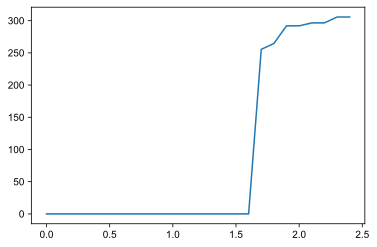

In [116]:
plt.plot(vset_list, np.array(curr_list) * 1e6/0.1)

In [120]:
vRead=0.1
Vgate=5

arr=2
rr=30
cc=20

vgate_set = 3.3
vset_list = np.arange(0,1.2,0.1)

curr_list = []

with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    a0.dut.connect(ser)
    
    for vset in vset_list:
        a0.pic_write_single(vset, vgate_set, array=arr, row=rr, col=cc, mode=0)
        
#         a0.set_single_int(vset, vgate_set, array=arr, row=rr, col=cc)
        
        rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1)
        curr_list.append(rdCurr)

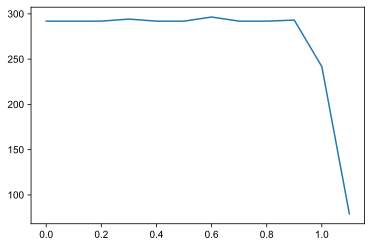

In [121]:
plt.plot(vset_list, np.array(curr_list) * 1e6/0.1)

In [134]:
vset = np.zeros((64,64)) + 2.0
vgate_set = np.zeros((64,64)) + 1.0

In [141]:
with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    a0.dut.connect(ser)
    a0.pic_write_batch(vset, vgate_set, array=2, mode=1)

Running <function DPE.read at 0x000001DF30765798> with serial
[INFO] Elapsed time = 0.23s
Serial disconnected


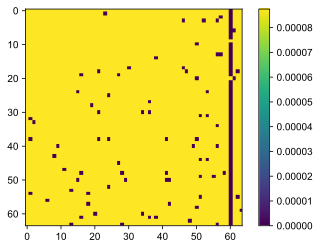

In [142]:
plt.imshow(dpe.read(2, gain=3))
plt.colorbar()

In [342]:
vreset = (g >300e-6) * 2.2

# vreset = np.zeros((64,64)) + 2 
vgate_reset = (g >300e-6) * 5.0

# plt.figure(1)
# plt.imshow(vreset)
# plt.colorbar()

# plt.figure(2)
# plt.imshow(vgate_reset)
# plt.colorbar()

In [343]:
with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    a0.dut.connect(ser)
    a0.pic_write_batch(vreset, vgate_reset, array=2, mode=0)

Running <function DPE.read at 0x000001DF30765798> with serial
[INFO] Elapsed time = 0.23s
Serial disconnected
1


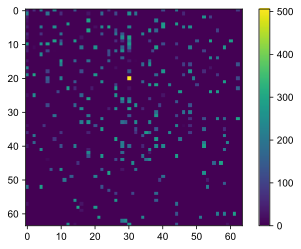

In [344]:
g = dpe.read(2, gain=2)

plt.imshow(g * 1e6)
plt.colorbar()

print( (g>300e-6).sum() )

In [349]:
g.argmax() %64

30

In [352]:
vRead=0.1
Vgate=5

arr=2
rr=20
cc=30

vgate_reset = 5
vreset_list = np.arange(0,2.0,0.1)

curr_list = []


with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    a0.dut.connect(ser)
    
    for vreset in vreset_list:
#         a0.pic_write_single(vreset, vgate_reset, array=arr, row=rr, col=cc, mode=0)
        
        a0.reset_single(vreset, vgate_reset, array=arr, row=rr, col=cc, Twidth=1e-6)
        
        rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1)
        curr_list.append(rdCurr)
        
        
        

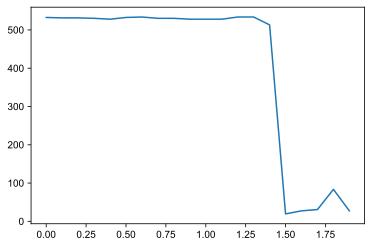

In [353]:
plt.plot(vreset_list, np.array(curr_list) * 1e6/0.1)